In [2]:
#check current directory
%cd
#change working directory where the file is
%cd ~\Desktop\Book_ML_deepL

C:\Users\EAMC
C:\Users\EAMC\Desktop\Book_ML_deepL


In [3]:
#in alternative manual download, then use pd
import pandas as pd
import csv as csv

df= pd.read_csv('housing.csv', sep=',')
df.head(10)
#in alternative, read data from url (nb raw version)
#url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
#df=pd.read_csv(url)
#df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
#check variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#ocean_proximity is not a numerical attribute. With value_counts() I count the level of the column, which is a Pandas Series obj
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#summary of numerical attributes
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


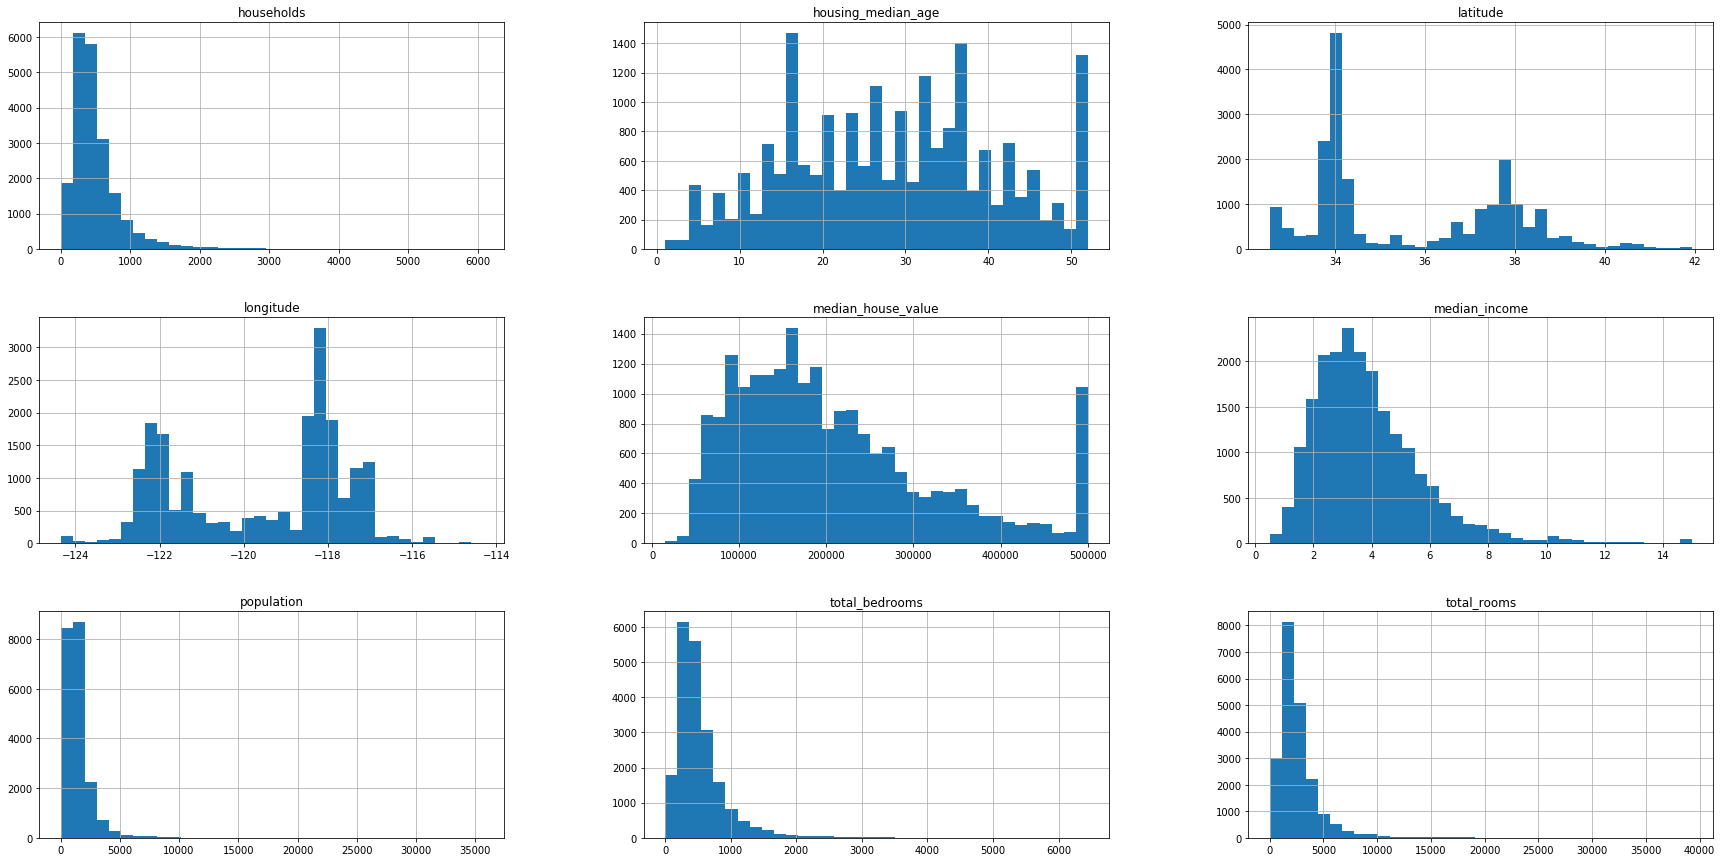

In [7]:
#draw simple histograms
import matplotlib.pyplot as plt
df.hist(bins=35, figsize=(30,15))
plt.show()

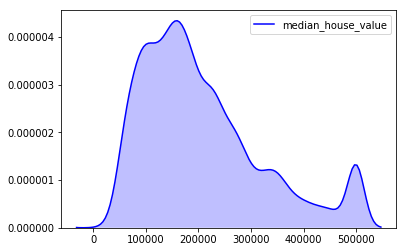

In [8]:
import seaborn as sns

#seabor is a wonderful library featuring a lot of interesting visualization, including violin plot
#if you don't use matplotlib inline, you will have to repeat plt.show every time...
%matplotlib inline

#kernel density estimates
sns.kdeplot(df.median_house_value, shade=True, color="b")


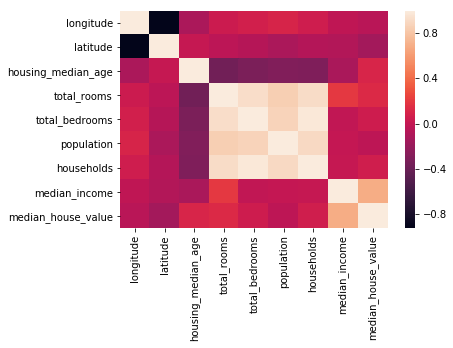

In [15]:
#Plotting a heatmap to visualize the correlation between the variables
sns.heatmap(df.corr())

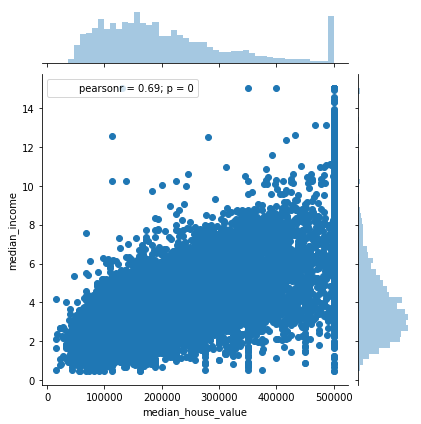

In [17]:
#joinplot to explore the relationship between housing median age and median income (negative strong corr)
sns.jointplot(x='median_house_value', y='median_income', data=df)

#the relationship is clear: the more you earn, the higher the value of your house. However, there is a stange pattern regarding 
#very expensive houses (over 50000), that seem associated even to households with low income. This may be due to the fact that
#the area gained value very fastly from one year to the other, so that even people with low incomes found themselves with 
#high-values properties? 


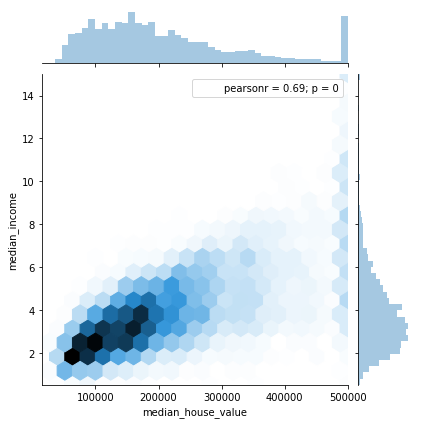

In [12]:
sns.jointplot(x='median_house_value', y='median_income', data=df, kind='hex', gridsize=20)

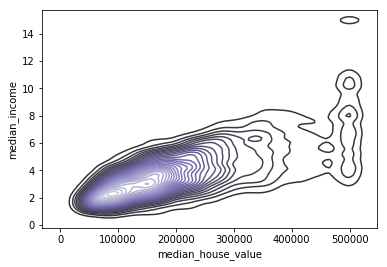

In [18]:
sns.kdeplot(df.median_house_value, df.median_income, n_levels=30, cmap="Purples_d", kind="kde")

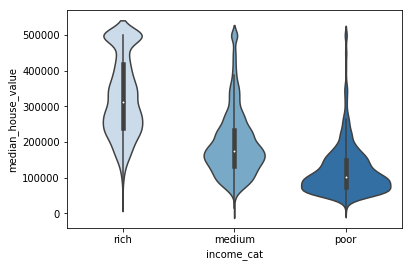

In [32]:
#create three income categories
def cat(x):
    if 0 < x <= 2.5:
        return 'poor'
    elif 2.5 < x <= 5:
        return 'medium'
    return 'rich'

df['income_cat'] = df['median_income'].apply(cat)
type(df['income_cat'])

#now use the new variable for a violin plot
sns.violinplot(x=df['income_cat'], y=df['median_house_value'], palette="Blues")